In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train['FullBath'].describe()

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64

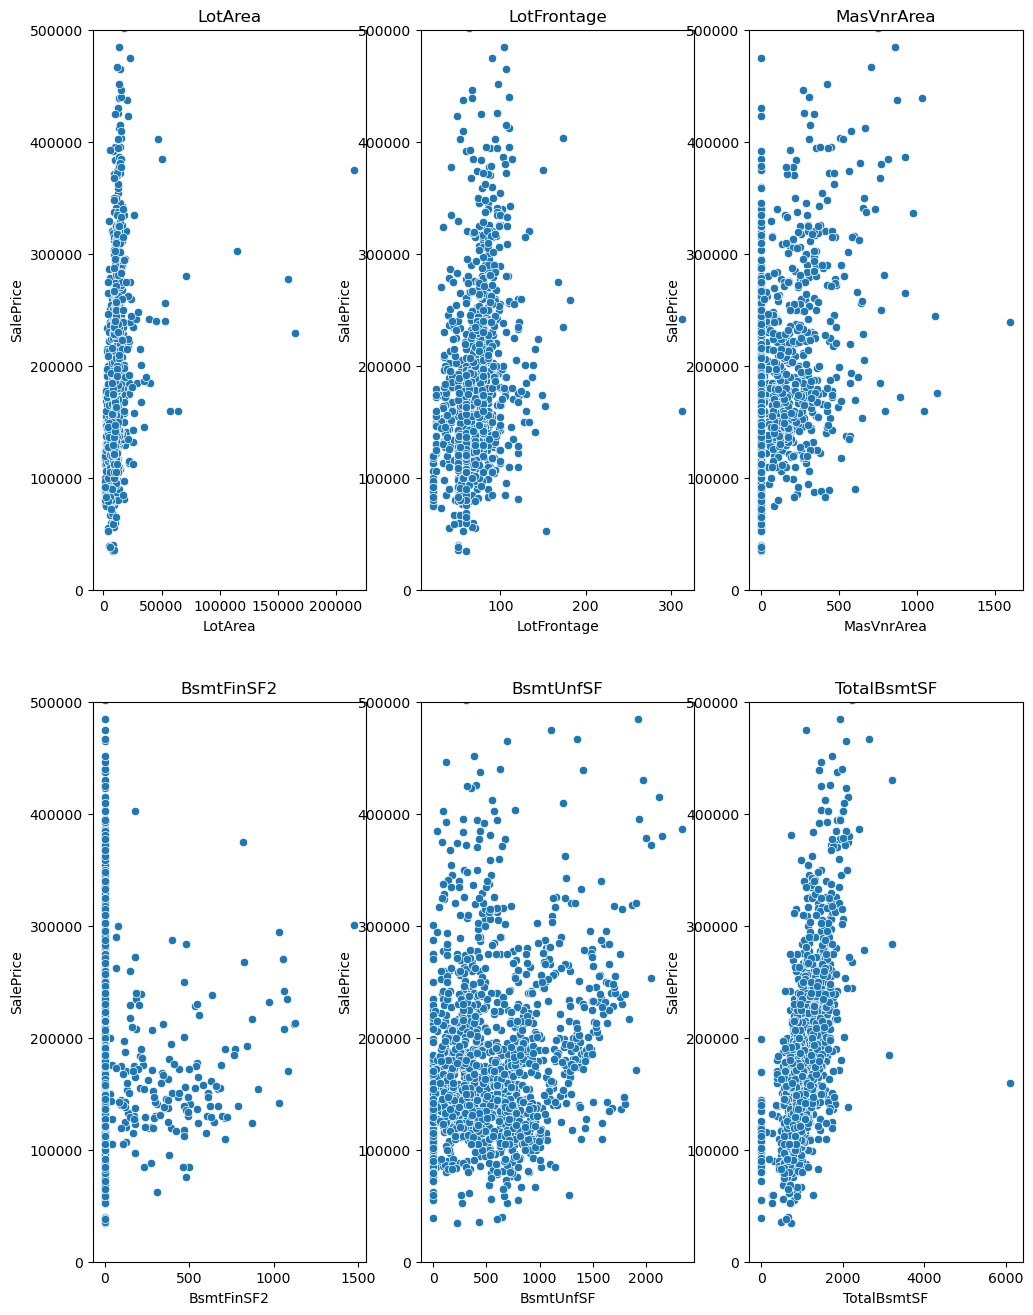

In [17]:
continuous = ['LotArea', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

fig, axes = plt.subplots(2,3,figsize=(12,16))

for index, axs in enumerate([item for sublist in axes for item in sublist]):
    sns.scatterplot(x=continuous[index], y='SalePrice', data=train, ax = axs)
    axs.set_title(continuous[index])
    axs.set_ylim(0,500000)

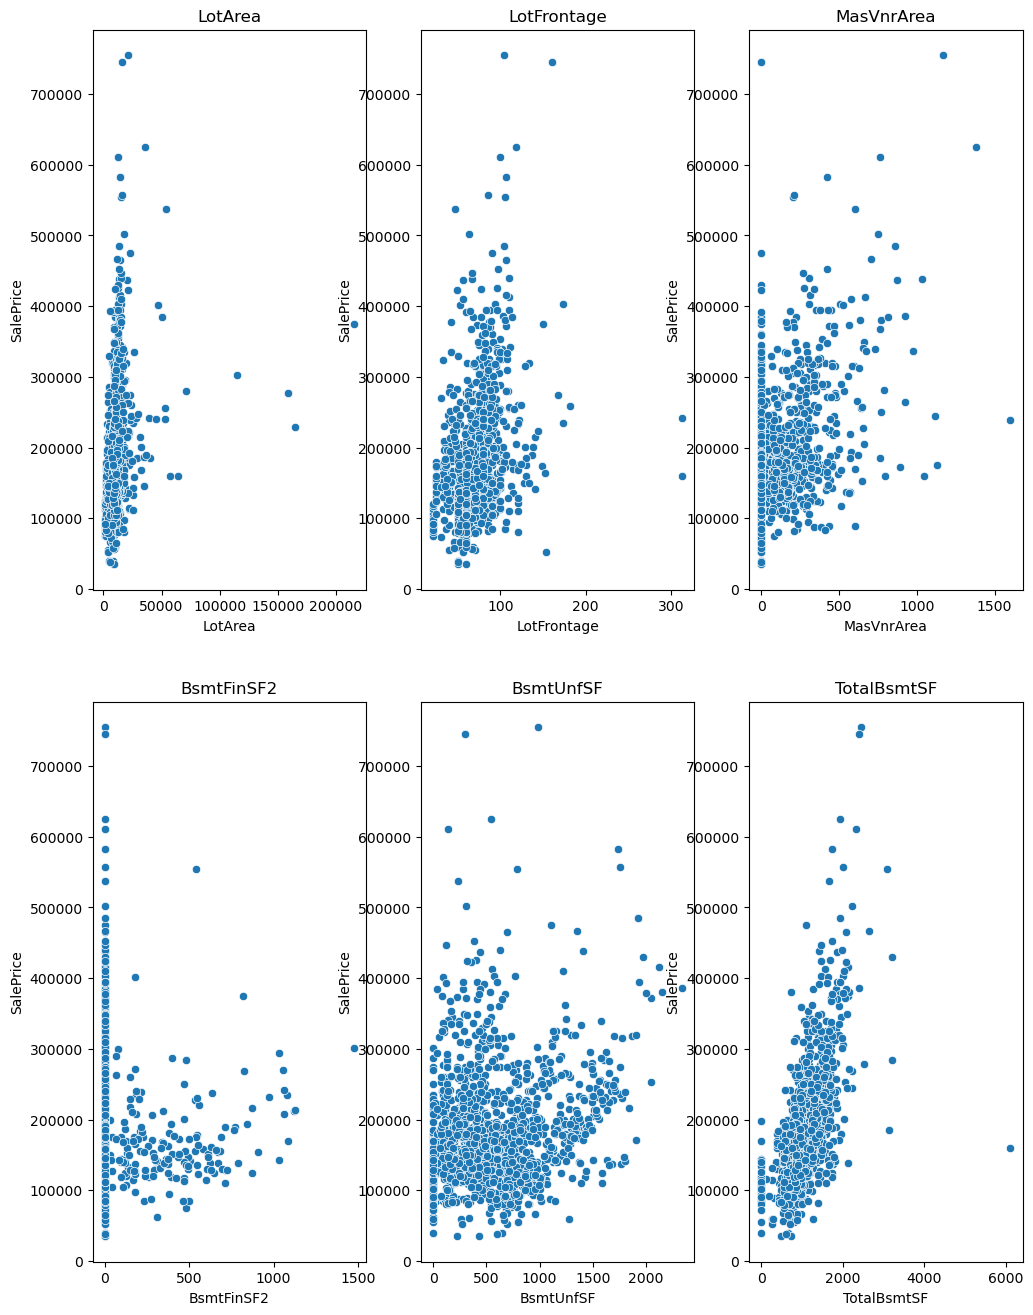

In [30]:
continuous = ['LotArea', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
plt.figure(figsize=(12,16))

for index in range(len(continuous)):
    plt.subplot(2,3,index+1)
    plt.title(continuous[index])
    sns.scatterplot(x=continuous[index], y='SalePrice', data=train)
    axs.set_title(continuous[index])
    axs.set_ylim(0,500000)

setting size for sns plots

<Axes: xlabel='BsmtUnfSF', ylabel='SalePrice'>

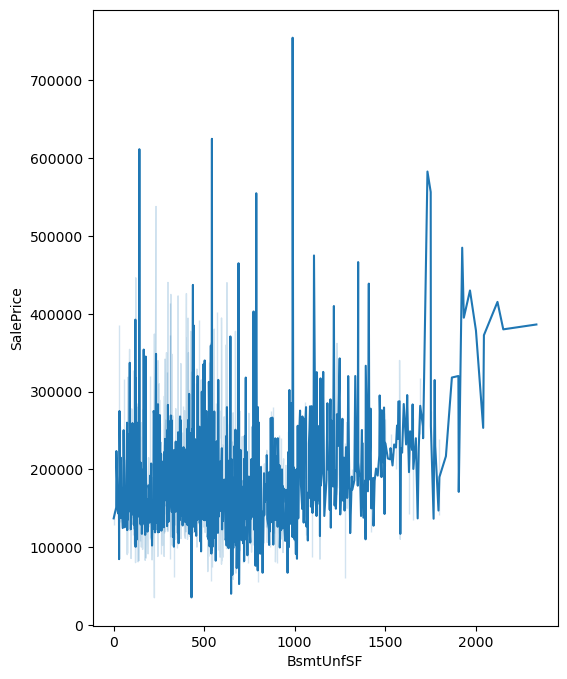

In [27]:
# f, ax = plt.subplots(figsize=(6,8))
# sns.lineplot(x=continuous[4], y='SalePrice', data=train, ax = ax)
plt.figure(figsize=(6,8))
sns.lineplot(x=continuous[4], y='SalePrice', data=train)

<Axes: xlabel='OverallQual', ylabel='Count'>

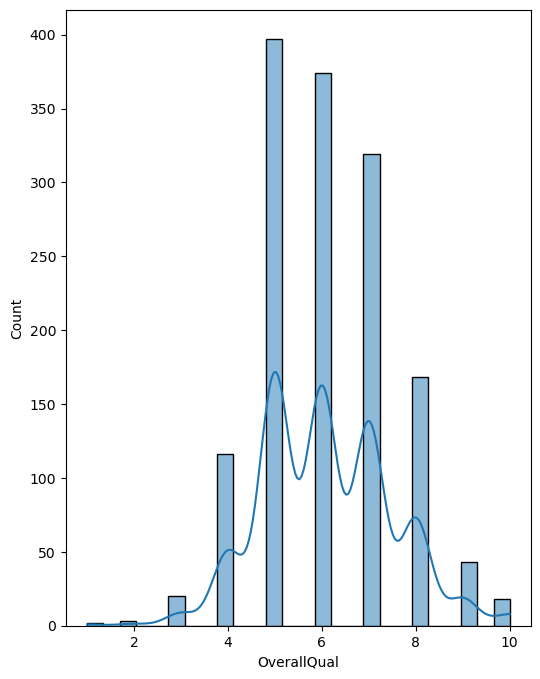

In [33]:
plt.figure(figsize=(6,8))
sns.histplot(data=train, x='OverallQual', kde=True)

<Axes: >

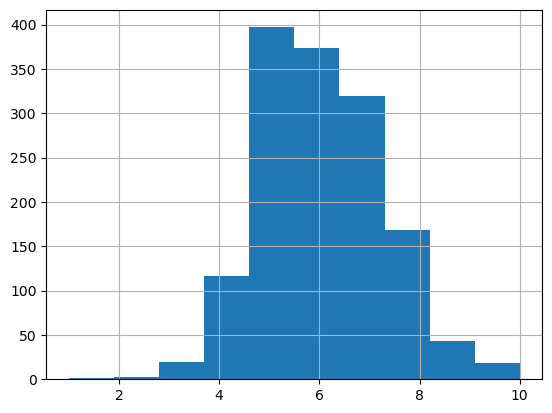

In [35]:
train['OverallQual'].hist()

In [46]:
mini = train.loc[:, ["MSSubClass","LotFrontage","LotArea","OverallQual","OverallCond","SalePrice"]]

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>],
       [<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>],
       [<Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'SalePrice'}>]], dtype=object)

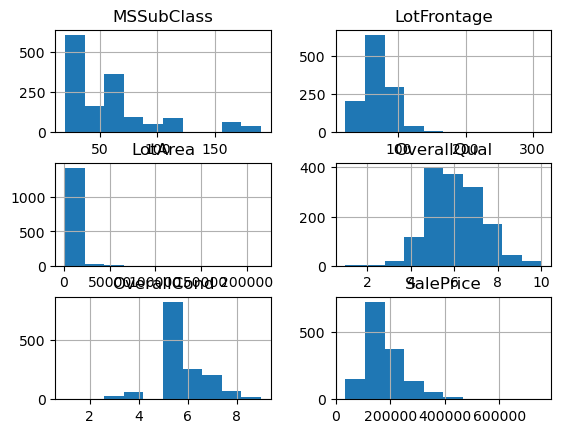

In [47]:
mini.hist()

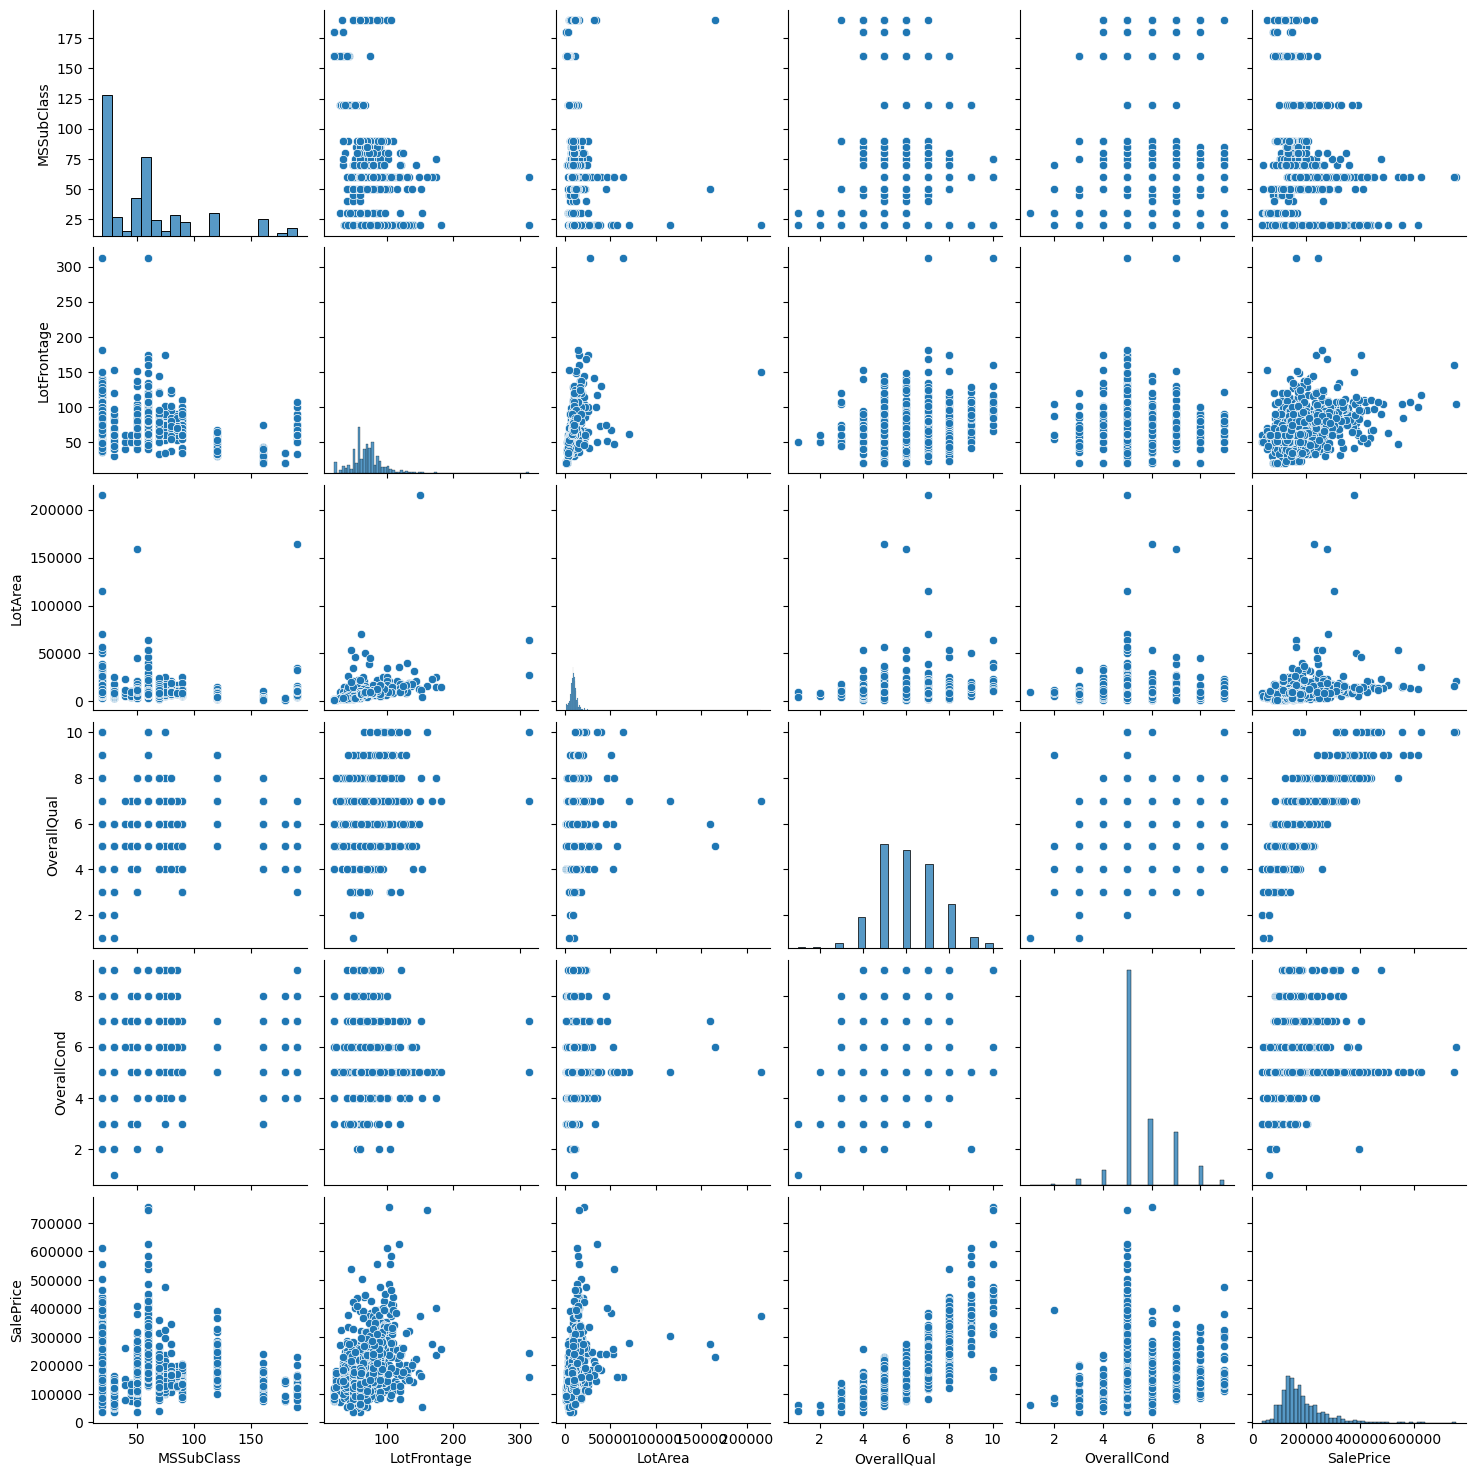

In [48]:
sns.pairplot(mini)

<Axes: >

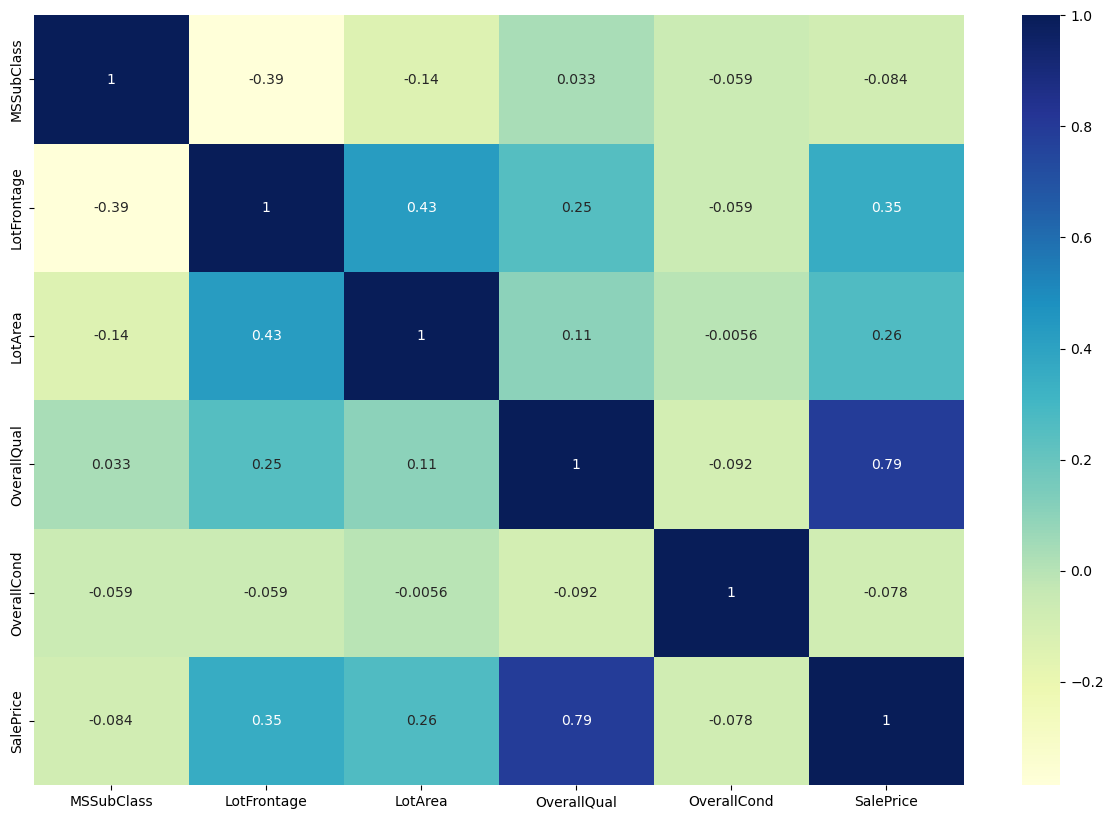

In [49]:
plt.figure(figsize=(15,10)) # set X and Y size
sns.heatmap(mini[mini.columns].corr(), cmap="YlGnBu", annot=True)

plot not with column names but with data

<Axes: >

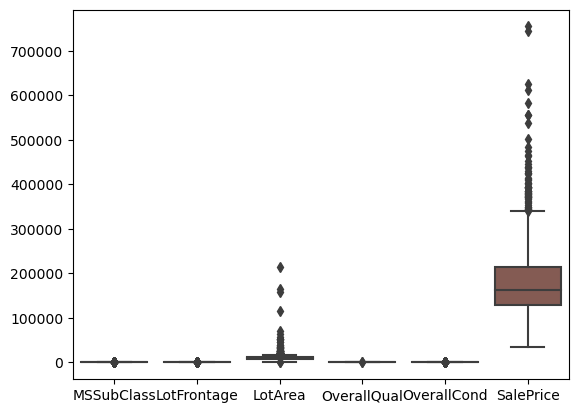

In [50]:
sns.boxplot(data=mini)

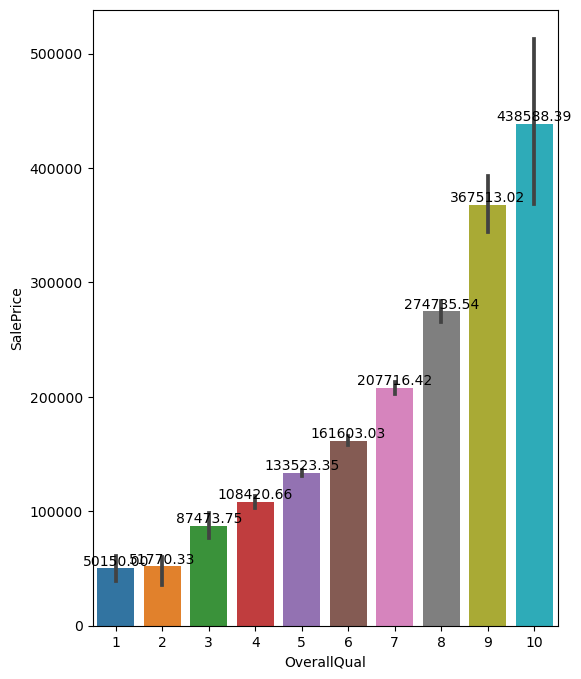

In [10]:
plt.figure(figsize=(6,8))
ax = sns.barplot(x=train['OverallQual'], y=train['SalePrice'])

for p in ax.patches:
    height = p.get_height()
    
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}'.format(height),
            ha='center', va='bottom')

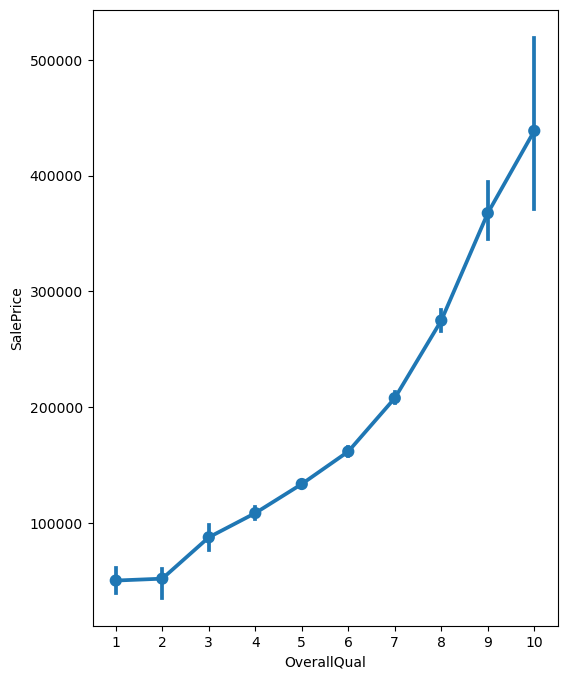

In [11]:
plt.figure(figsize=(6,8))
ax = sns.pointplot(x=train['OverallQual'], y=train['SalePrice'])

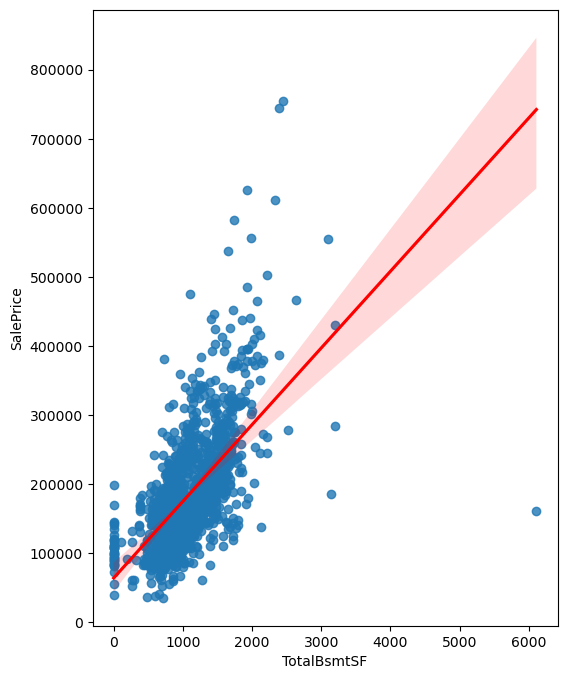

In [13]:
plt.figure(figsize=(6,8))
ax = sns.regplot(x=train['TotalBsmtSF'], y=train['SalePrice'], line_kws = dict(color='r'))

### Classification

In [3]:
titanic = pd.read_csv('titanic/train.csv')

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


IndexError: list index out of range

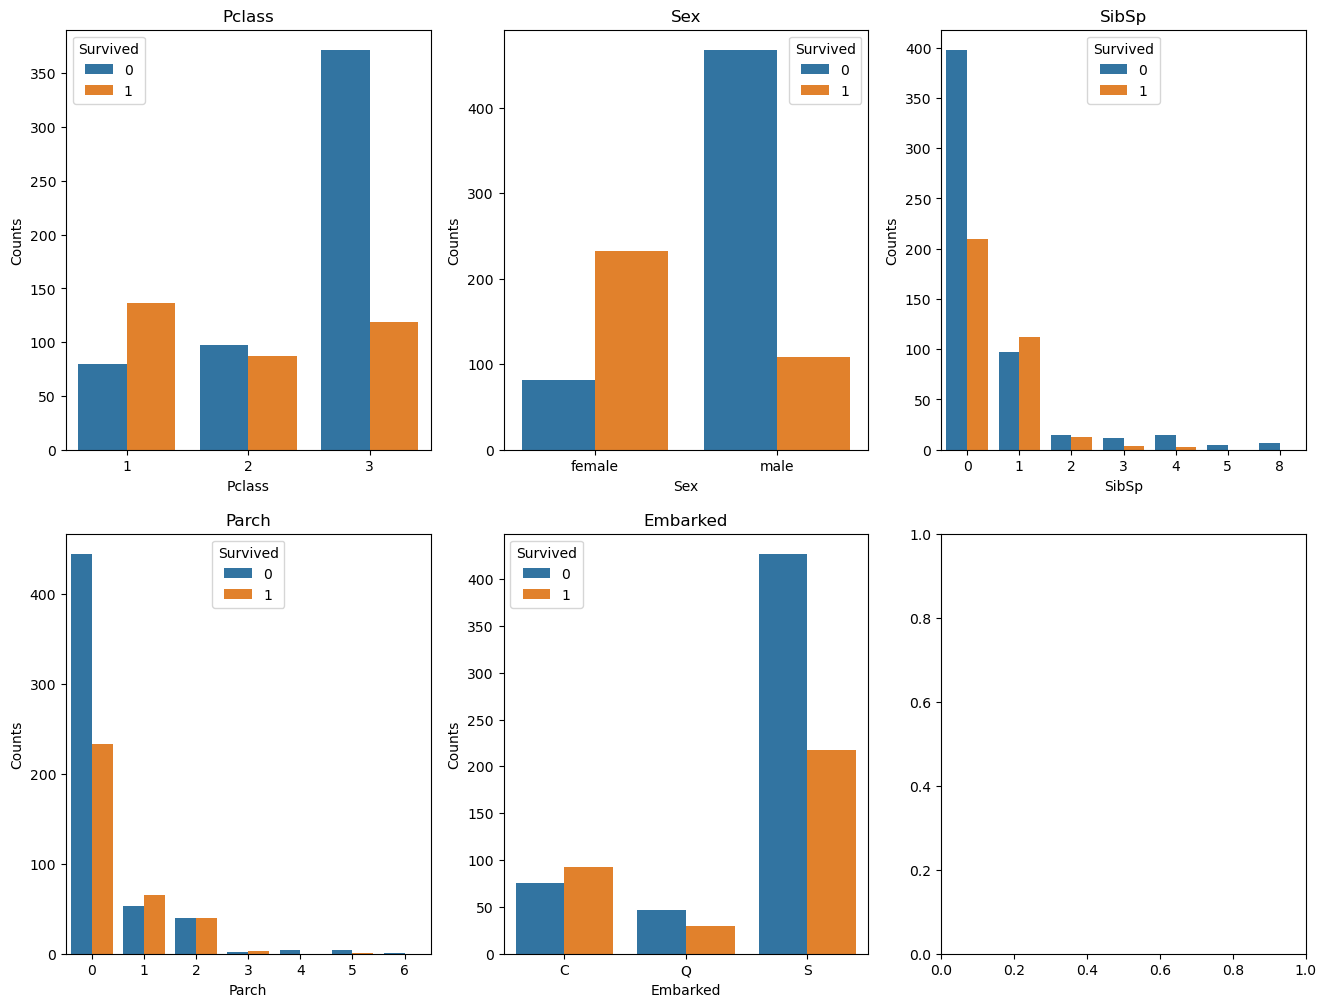

In [20]:
categorical = ['Pclass','Sex','SibSp','Parch','Embarked']
fig, axes = plt.subplots(2,3,figsize=(16,12))

for index, ax in enumerate(axes.flatten()):
    grouped_df = titanic.groupby([categorical[index],'Survived']).size().reset_index(name='Counts')
    sns.barplot(x=categorical[index], y='Counts', hue='Survived', data=grouped_df, ax=ax)
    ax.set_title(categorical[index])

IndexError: list index out of range

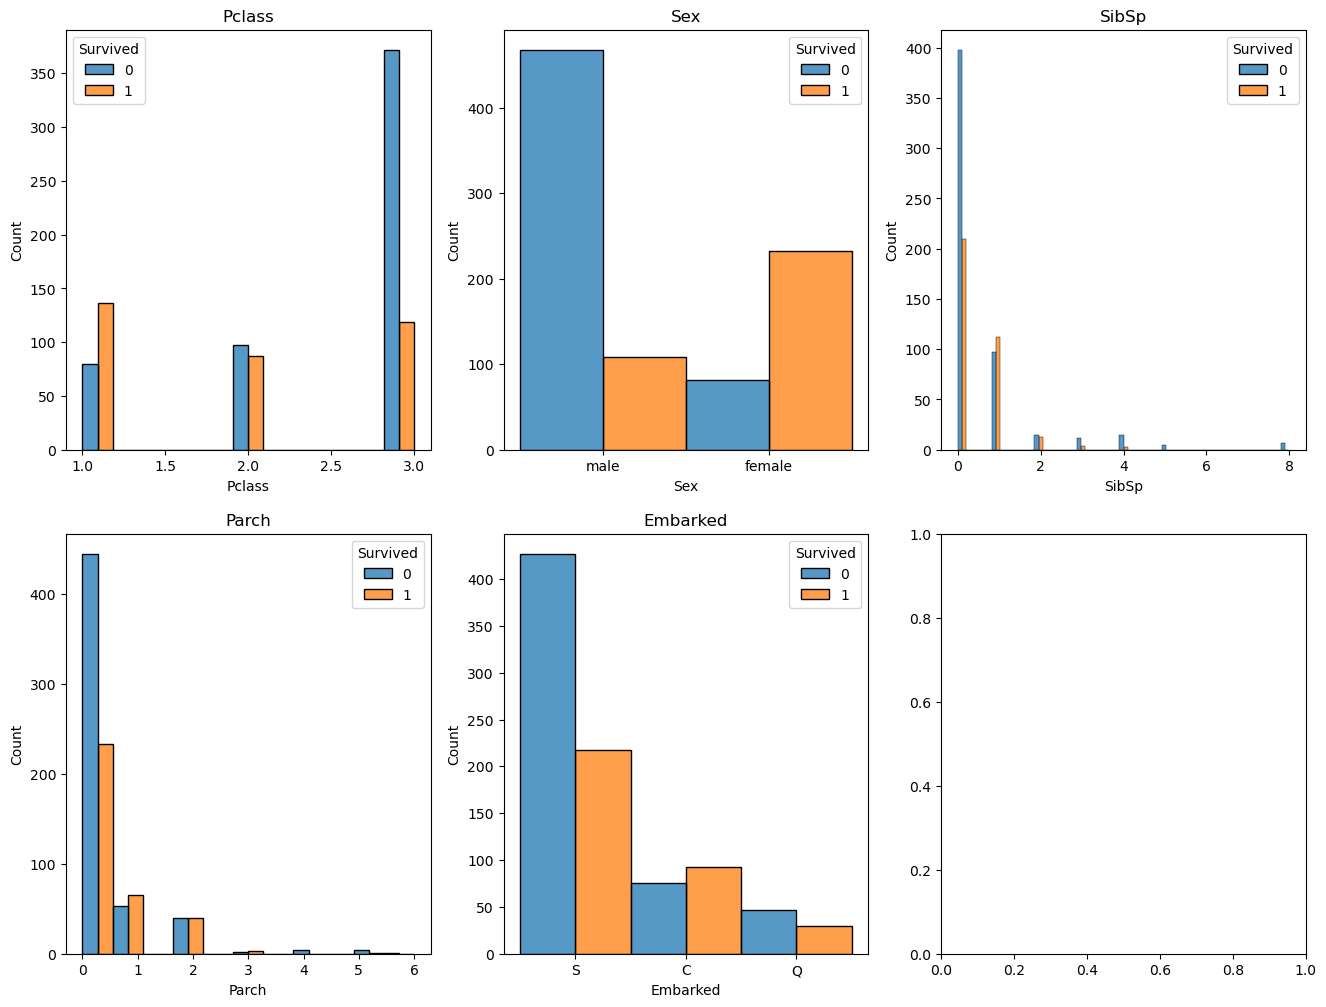

In [22]:
categorical = ['Pclass','Sex','SibSp','Parch','Embarked']
fig, axes = plt.subplots(2,3,figsize=(16,12))

for index, ax in enumerate(axes.flatten()):
    sns.histplot(x=categorical[index], hue='Survived', multiple='dodge', data=titanic, ax=ax)
    ax.set_title(categorical[index])

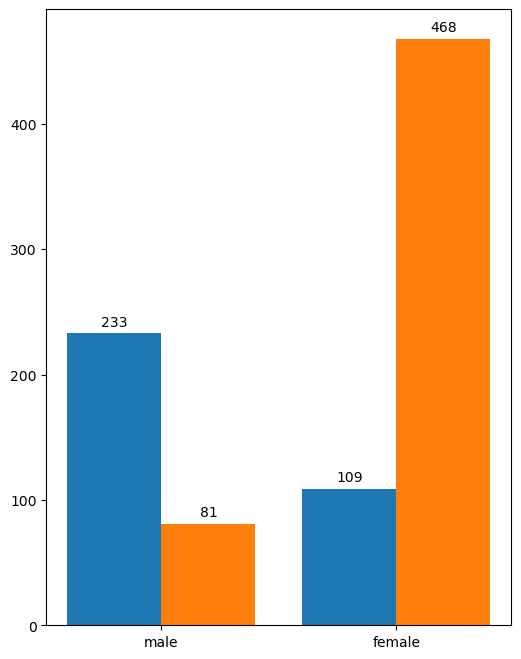

In [66]:
fig, axes = plt.subplots(figsize=(6,8))

x = np.arange(len(titanic['Sex'].unique()))
width = 0.4

rects = axes.bar(x, height=titanic[titanic['Survived']==1].groupby('Sex').size(), width=width)
axes.bar_label(rects, padding=3)
rectss = axes.bar(x+width, height=titanic[titanic['Survived']==0].groupby('Sex').size(), width=width)
axes.bar_label(rectss, padding=3)

axes.set_xticks(x+width/2, titanic['Sex'].unique())

plt.show()

<Axes: xlabel='Age', ylabel='Count'>

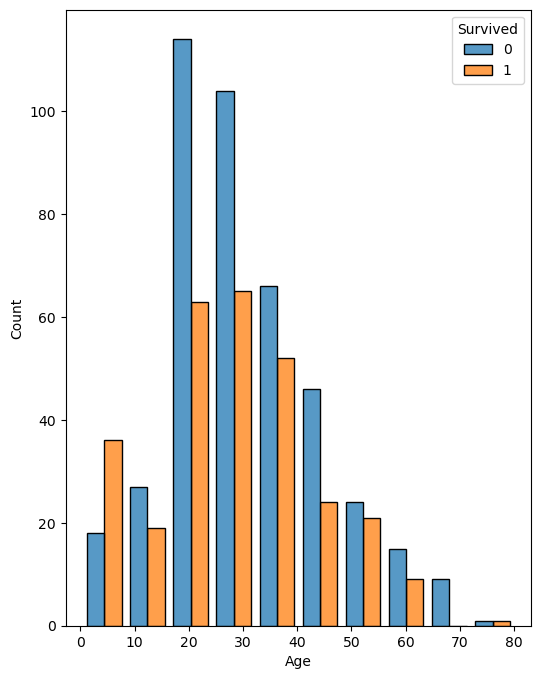

In [71]:
plt.figure(figsize=(6,8))

sns.histplot(x='Age', hue='Survived', data=titanic, multiple='dodge', shrink=0.8, bins=10)

([<matplotlib.patches.Wedge at 0x17d657fc1c0>,
 [Text(0.34759742562046436, 1.043635966083014, '3'),
  Text(-1.086614775833759, -0.17107989051828945, '1'),
  Text(0.5056815692248013, -0.9768757088526373, '2')],
 [Text(0.18959859579298052, 0.5692559814998257, '39.8%'),
  Text(-0.5926989686365958, -0.09331630391906696, '25.4%'),
  Text(0.2758263104862552, -0.5328412957378021, '34.8%')])

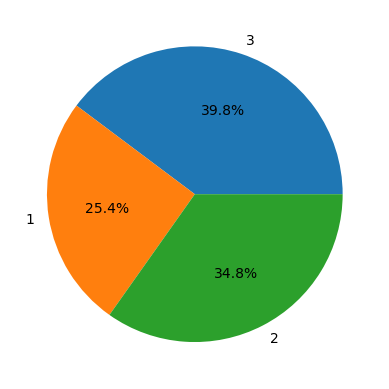

In [80]:
pclass_surv = titanic[titanic['Survived']==1].groupby('Pclass').size()
plt.pie(pclass_surv, labels = titanic['Pclass'].unique(), autopct='%1.1f%%')

In [77]:
titanic[titanic['Survived']==1].groupby('Pclass').size()

Pclass
1    136
2     87
3    119
dtype: int64

In [97]:
l16 = titanic[(titanic['Fare'] < 16)].groupby('Survived').size()
m16 = titanic[(titanic['Fare'] > 16)].groupby('Survived').size()

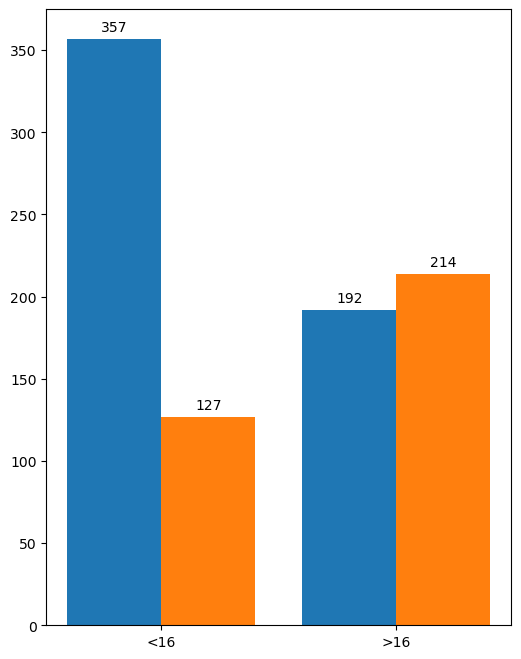

In [104]:
fig, axes = plt.subplots(figsize=(6,8))

x = np.arange(2)
width = 0.4

rects = axes.bar(x, [l16[0],m16[0]], width=width)
axes.bar_label(rects, padding=3)
rectss = axes.bar(x+width, [l16[1],m16[1]], width=width)
axes.bar_label(rectss, padding=3)

axes.set_xticks(x+width/2, ['<16','>16'])
plt.show()

In [ ]:
# try seaborn???????????????????